In [ ]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
from keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator

In [ ]:
Fruit = ['banana','dragon-fruit','guava','jackfruit','mango','mangosteen','melon','papaya','pineapple','water-melon']
dir_train = '/content/drive/MyDrive/fruit-recognition' 
distpath = []
X_train = []
y_train = []
X_test = []
y_test = []

In [ ]:
def create_data(dir, x_train, y_train):
  for i in Fruit:
    path = os.path.join(dir,i)
    index_label = Fruit.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(150,150)) 
      img = img_to_array(img)
      img = img.reshape(150,150,3) 
      img = img.astype('float32')
      img = img/255
      X_train.append(img)
      y_train.append(index_label)
create_data(dir_train, X_train, y_train)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train, 10)
print(X_train.shape) 
print(y_train.shape)

(100, 150, 150, 3)
(100, 10)


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(27,48),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3),strides=(9,16)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64,kernel_size=(27,48), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=128,kernel_size=(27,48), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu',input_shape=(67500,), name='layer1')) 
model.add(Dense(1028, activation='relu', name='layer2'))
model.add(Dense(1028, activation='relu', name='layer3'))
model.add(Dense(10, activation='softmax', name='layer4'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 17, 10, 32)        124448    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 5, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 5, 64)          2654272   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 2, 128)         10616960  
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 1, 128)        0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs = 100, verbose=1,batch_size=40)

Epoch 1/100
3/3 [==============================] - 8s 2s/step - loss: 2.3523 - accuracy: 0.0400
Epoch 2/100
3/3 [==============================] - 9s 3s/step - loss: 2.3060 - accuracy: 0.0700
Epoch 3/100
3/3 [==============================] - 9s 2s/step - loss: 2.3032 - accuracy: 0.0700
Epoch 4/100
3/3 [==============================] - 7s 2s/step - loss: 2.3009 - accuracy: 0.1000
Epoch 5/100
3/3 [==============================] - 7s 2s/step - loss: 2.2923 - accuracy: 0.0900
Epoch 6/100
3/3 [==============================] - 7s 2s/step - loss: 2.2932 - accuracy: 0.1000
Epoch 7/100
3/3 [==============================] - 7s 2s/step - loss: 2.2831 - accuracy: 0.1100
Epoch 8/100
3/3 [==============================] - 7s 2s/step - loss: 2.2879 - accuracy: 0.0800
Epoch 9/100
3/3 [==============================] - 7s 2s/step - loss: 2.2509 - accuracy: 0.1700
Epoch 10/100
3/3 [==============================] - 8s 2s/step - loss: 2.2221 - accuracy: 0.1800
Epoch 11/100
3/3 [=====================

In [ ]:
model.save('Fruit.h5')

water-melon


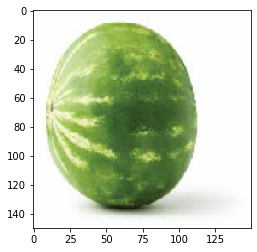

In [ ]:
filename = '/content/drive/MyDrive/fruit-recognition/water-melonTest.jpg'  
food = image.load_img(filename, target_size=(150,150))
plt.imshow(food)
food = img_to_array(food)
food = food.reshape(1,150,150,3) 
food = food.astype('float32')
food = food/255
np.argmax(model.predict(food), axis=1)

if np.argmax(model.predict(food)) == 0:
   print("banana")
if np.argmax(model.predict(food)) == 1:
   print("dragon-fruit")
if np.argmax(model.predict(food)) == 2:
   print("guava")
if np.argmax(model.predict(food)) == 3:
   print("jackfruit")
if np.argmax(model.predict(food)) == 4:
   print("mango")
if np.argmax(model.predict(food)) == 5:
   print("mangosteen")
if np.argmax(model.predict(food)) == 6:
   print("melon")
if np.argmax(model.predict(food)) == 7:
   print("papaya")
if np.argmax(model.predict(food)) == 8:
   print("pineapple")
if np.argmax(model.predict(food)) == 9:
   print("water-melon")  

mango


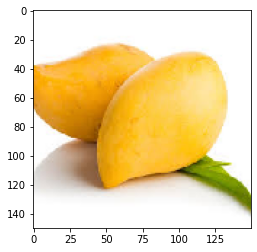

In [ ]:
filename = '/content/drive/MyDrive/fruit-recognition/mangoTest.jpg'  
food = image.load_img(filename, target_size=(150,150))
plt.imshow(food)
food = img_to_array(food)
food = food.reshape(1,150,150,3) 
food = food.astype('float32')
food = food/255
np.argmax(model.predict(food), axis=1)

if np.argmax(model.predict(food)) == 0:
   print("banana")
if np.argmax(model.predict(food)) == 1:
   print("dragon-fruit")
if np.argmax(model.predict(food)) == 2:
   print("guava")
if np.argmax(model.predict(food)) == 3:
   print("jackfruit")
if np.argmax(model.predict(food)) == 4:
   print("mango")
if np.argmax(model.predict(food)) == 5:
   print("mangosteen")
if np.argmax(model.predict(food)) == 6:
   print("melon")
if np.argmax(model.predict(food)) == 7:
   print("papaya")
if np.argmax(model.predict(food)) == 8:
   print("pineapple")
if np.argmax(model.predict(food)) == 9:
   print("water-melon")  